In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno 
import re


from sklearn.preprocessing import StandardScaler, LabelEncoder 

In [2]:
car_df = pd.read_csv("Data/Car details v3.csv")
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


<Axes: >

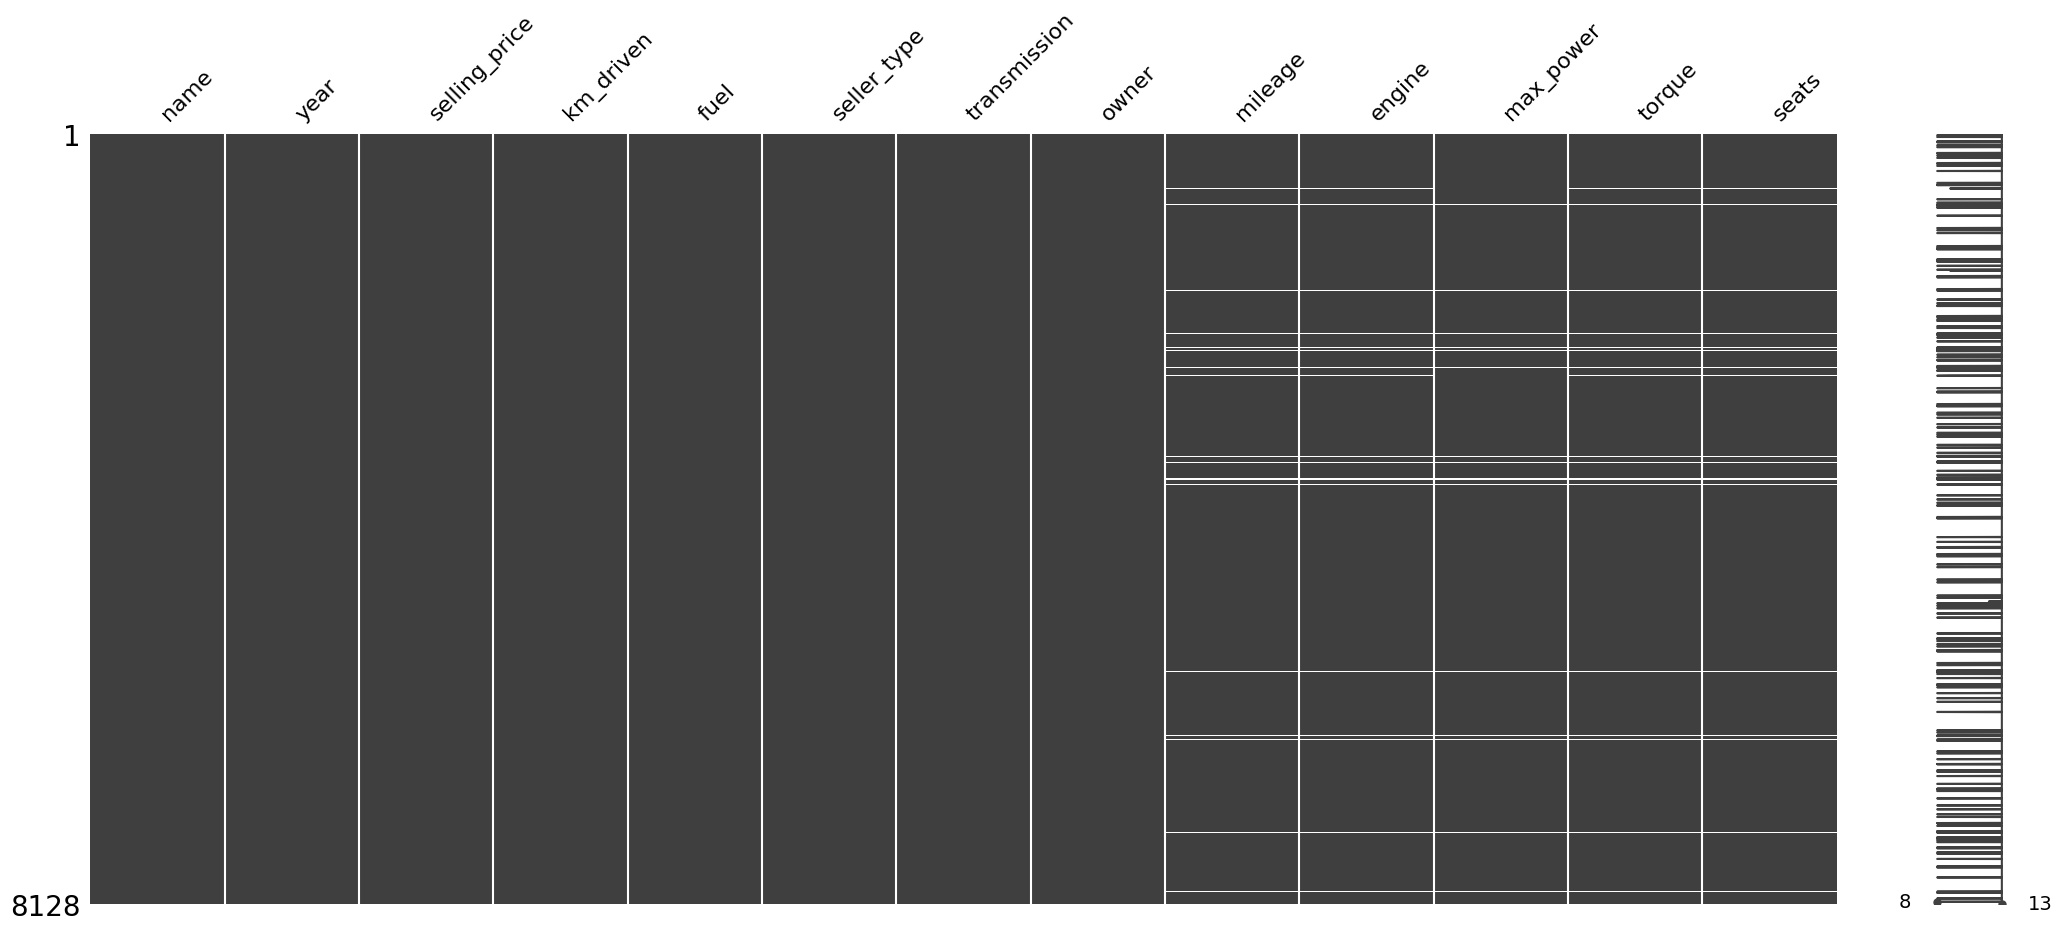

In [5]:
msno.matrix(car_df)

<Axes: >

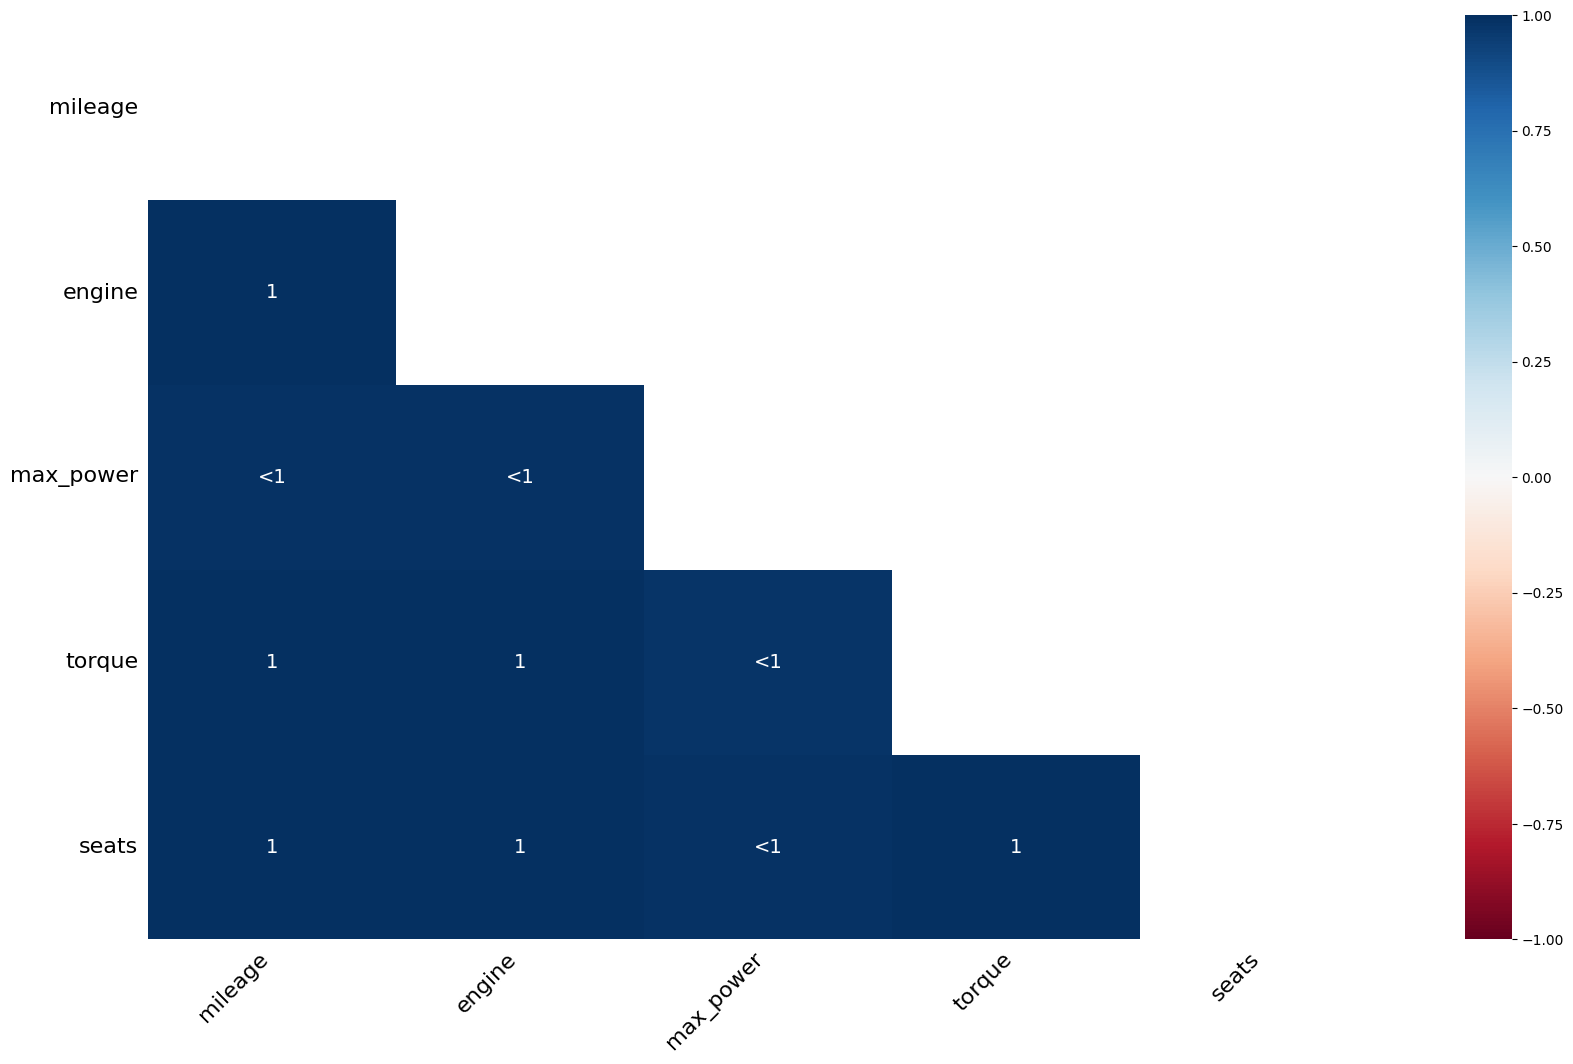

In [6]:
msno.heatmap(car_df)

In [7]:
car_df.dropna(inplace=True)

<Axes: >

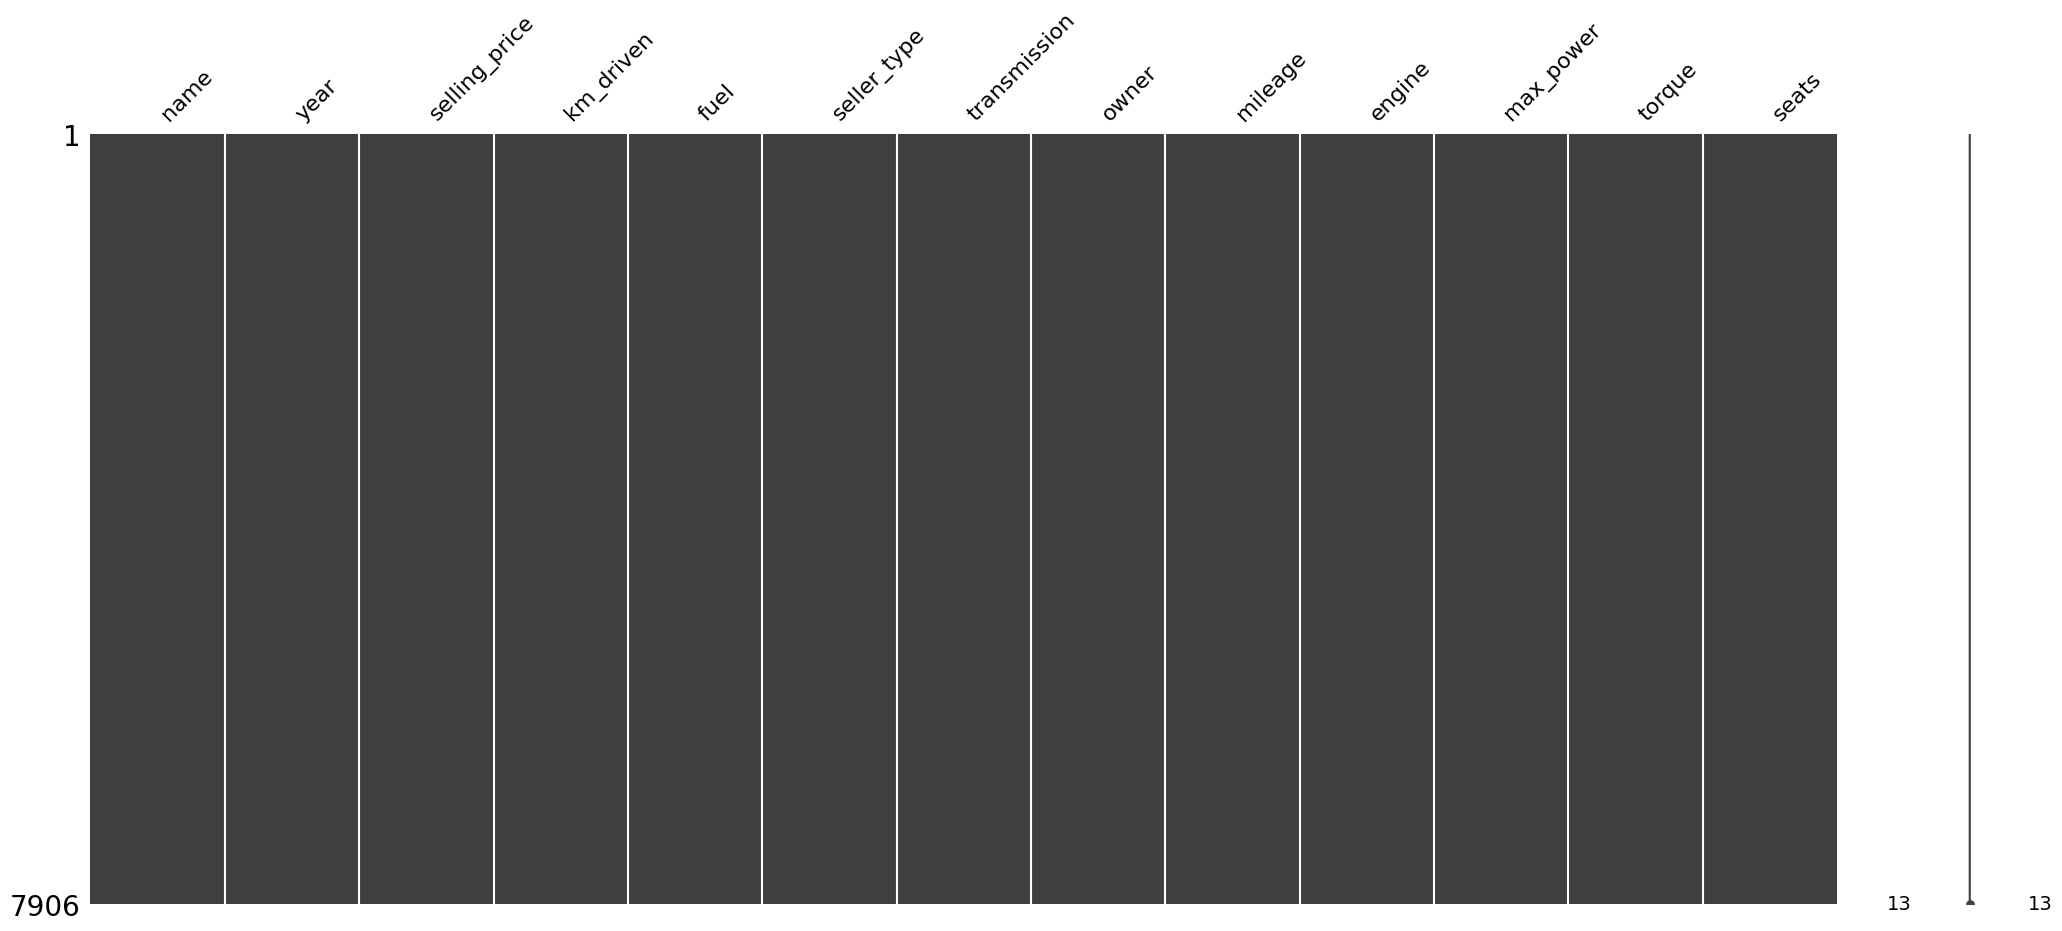

In [8]:
msno.matrix(car_df)

In [9]:
car_df.reset_index(inplace=True)
car_df.drop(columns="index",inplace=True)
car_df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [10]:
car_name = []
brand = []
for i in range(len(car_df["name"])):
    value = car_df.loc[i, "name"].split(" ")
    if " ".join(value[0:2]) == "Land Rover":
        brand.append("Land Rover")
        car_name.append(" ".join(value[2:]))
    else:
        brand.append(value[0])
        car_name.append(" ".join(value[1:]))

car_df["brand"] = brand
car_df["car_name"] = car_name

In [13]:
car_df.drop(columns="name",inplace=True)

In [14]:
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai,i20 Magna
7902,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,Verna CRDi SX
7903,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire ZDi
7904,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata,Indigo CR4


In [16]:
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   object 
 8   engine         7906 non-null   object 
 9   max_power      7906 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7906 non-null   float64
 12  brand          7906 non-null   object 
 13  car_name       7906 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 864.8+ KB


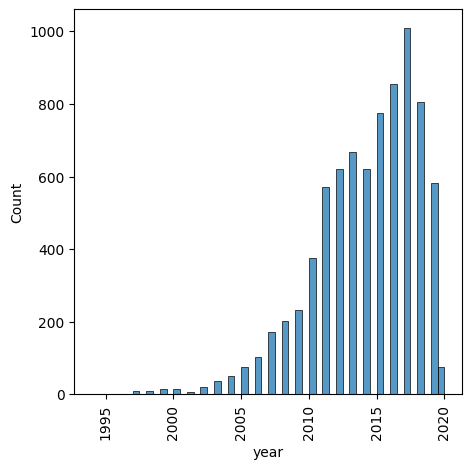

In [31]:
plt.figure(figsize=(5,5))
plot = sns.histplot(car_df, x="year",)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

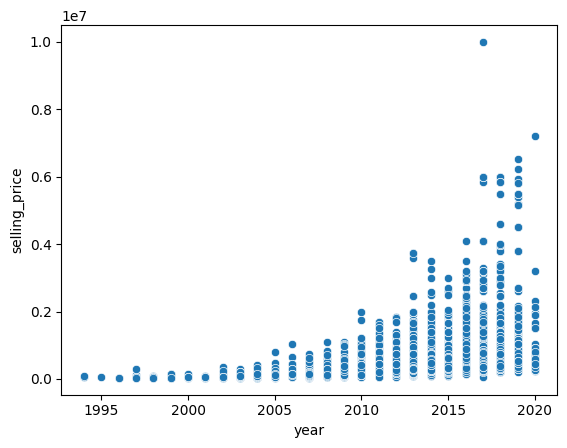

In [33]:
sns.scatterplot(car_df, x="year", y='selling_price')

<Axes: xlabel='selling_price', ylabel='km_driven'>

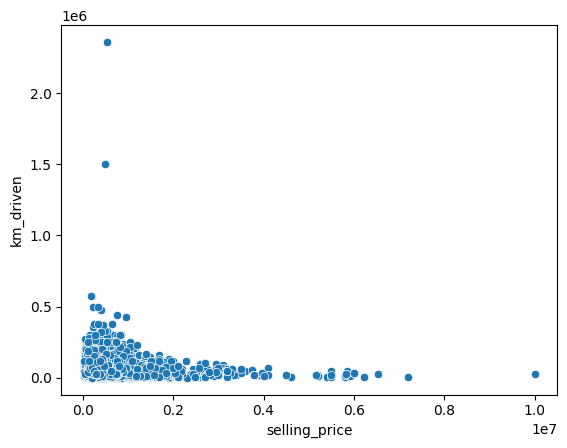

In [37]:
sns.scatterplot(car_df, x="selling_price", y="km_driven")

<Axes: xlabel='fuel', ylabel='Count'>

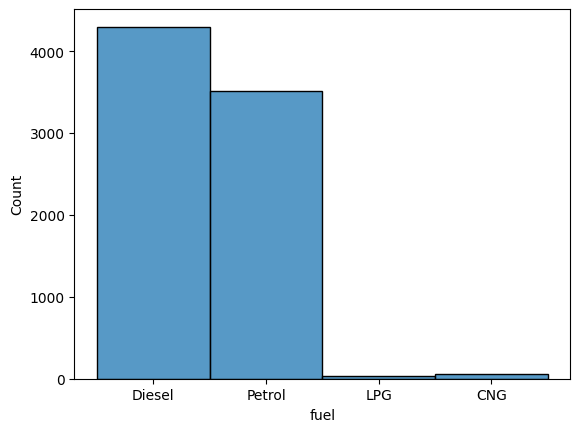

In [42]:
sns.histplot(car_df, x="fuel")

In [47]:
car_df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

<Axes: xlabel='seller_type', ylabel='Count'>

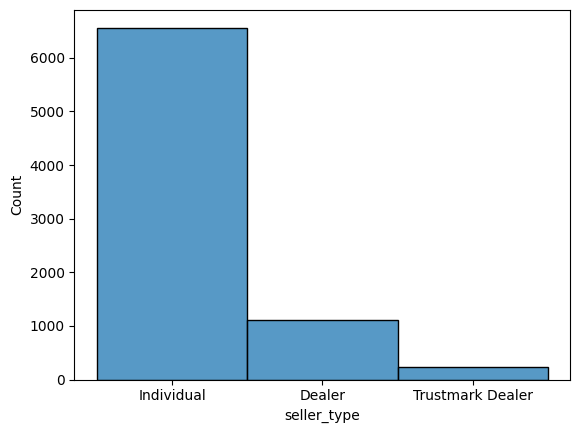

In [48]:
sns.histplot(car_df,x="seller_type")

count       7906
unique         2
top       Manual
freq        6865
Name: transmission, dtype: object


<Axes: xlabel='transmission', ylabel='Count'>

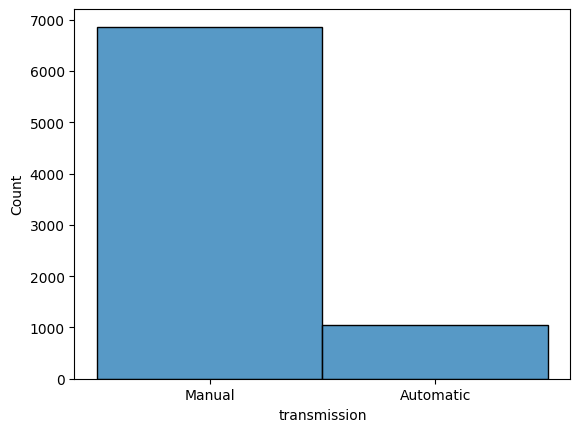

In [51]:
print(car_df.transmission.describe())
sns.histplot(car_df, x="transmission")

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


<Axes: xlabel='owner', ylabel='Count'>

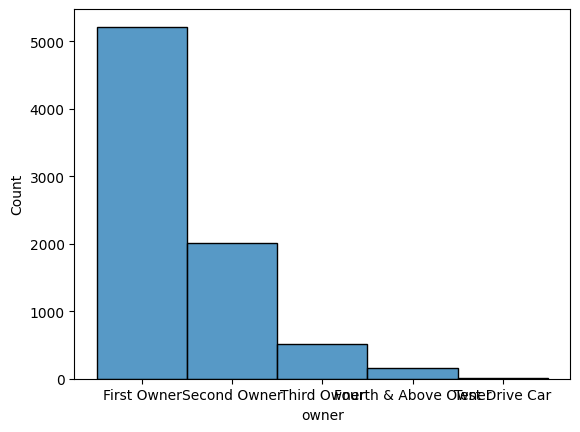

In [54]:
print(car_df.owner.unique())
sns.histplot(car_df, x="owner")

In [62]:
mileage = []
for val in car_df.mileage:
    val = float(val.split(" ")[0])
    mileage.append(val)
car_df["mileage"] = mileage

<Axes: xlabel='mileage', ylabel='Count'>

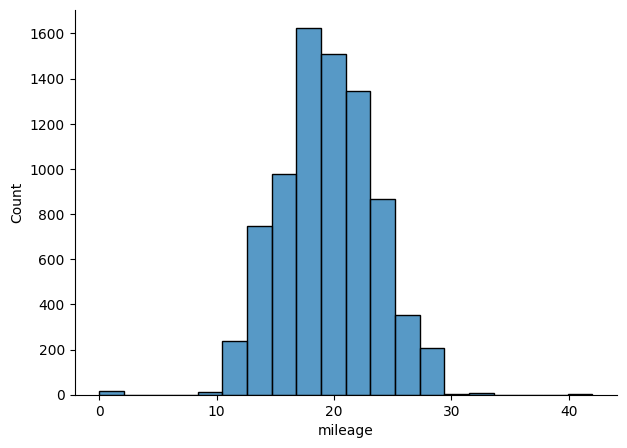

In [65]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(car_df['mileage'], bins=20)

<Axes: xlabel='mileage', ylabel='selling_price'>

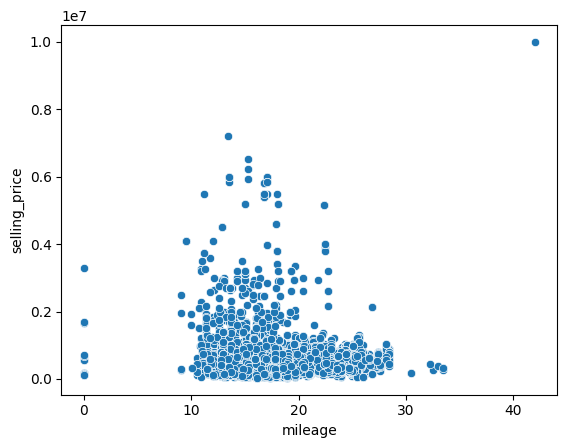

In [67]:
sns.scatterplot(car_df, x="mileage", y="selling_price")

C:\Users\ayoub\AppData\Local\Temp\ipykernel_12596\1428288055.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=car_df['mileage'], y=car_df['selling_price'], cmap="Reds", shade=True, bw=.15)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_12596\1428288055.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=car_df['mileage'], y=car_df['selling_price'], cmap="Reds", shade=True, bw=.15)


<Axes: xlabel='mileage', ylabel='selling_price'>

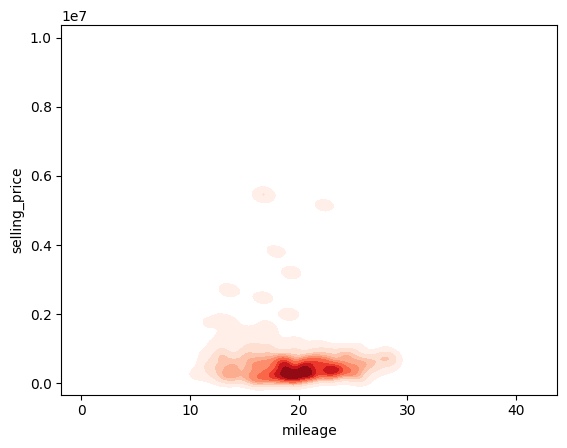

In [77]:
sns.kdeplot(x=car_df['mileage'], y=car_df['selling_price'], cmap="Reds", shade=True, bw=.15)

In [74]:
engine = []
for val in car_df.engine:
    engine.append(int(val.replace(" CC","")))

car_df["engine"] = engine
car_df["engine"]

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
7901    1197
7902    1493
7903    1248
7904    1396
7905    1396
Name: engine, Length: 7906, dtype: int64

<Axes: xlabel='engine', ylabel='Count'>

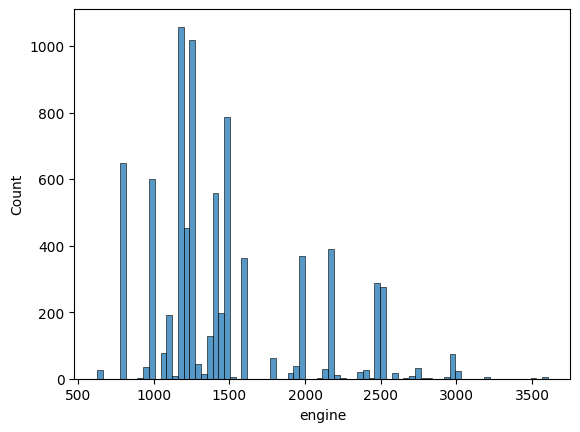

In [79]:
sns.histplot(car_df, x="engine")

<Axes: xlabel='engine', ylabel='selling_price'>

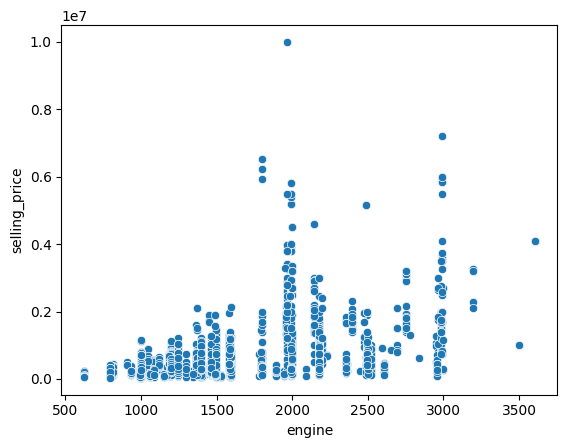

In [80]:
sns.scatterplot(car_df, x="engine", y="selling_price")

In [83]:
max_power = []
for val in car_df.max_power:
    max_power.append(float(val.replace(" bhp","")))

car_df["max_power"] = max_power
car_df["max_power"]

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
7901     82.85
7902    110.00
7903     73.90
7904     70.00
7905     70.00
Name: max_power, Length: 7906, dtype: float64

In [124]:
car_df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'brand', 'car_name', 'torque_Nm', 'rpm_min', 'rpm_max'],
      dtype='object')

In [118]:

torque_Nm_arr = []
rpm_min_arr = []
rpm_max_arr = []
def preprocess_torque_data(data):
    processed_data = []
    conversion_factor = 9.80665  # 1 kgm to Nm

    for entry in data:
        # Extract torque, unit, and rpm range
        entry = entry.replace(",","").replace("at","")
        match = re.match(r"([\d.]+)\s*([a-zA-Z]*)\s*@?\s*(\d+(?:-\d+)?)(?:[^\d]*rpm)?", entry)
        if match:
            torque = float(match.group(1))
            unit = match.group(2).lower()
            rpm_range = match.group(3)
            
            # Convert kgm to Nm
            if unit == "kgm":
                torque *= conversion_factor

            # Parse RPM range
            if "-" in rpm_range:
                rpm_min, rpm_max = map(int, rpm_range.split("-"))
            else:
                rpm_min = rpm_max = int(rpm_range)

            # Append standardized data
            torque_Nm_arr.append(round(torque, 2))
            rpm_min_arr.append(rpm_min)
            rpm_max_arr.append(rpm_max)

            
preprocess_torque_data(list(car_df.torque))

car_df["torque_Nm"] = torque_Nm_arr
car_df["rpm_min"] = rpm_min_arr
car_df["rpm_max"] = rpm_max_arr

C:\Users\ayoub\AppData\Local\Temp\ipykernel_12596\3738574267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df[col], bins = 100)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_12596\3738574267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df[col], bins = 100)
C:\Users\ayoub\AppDa

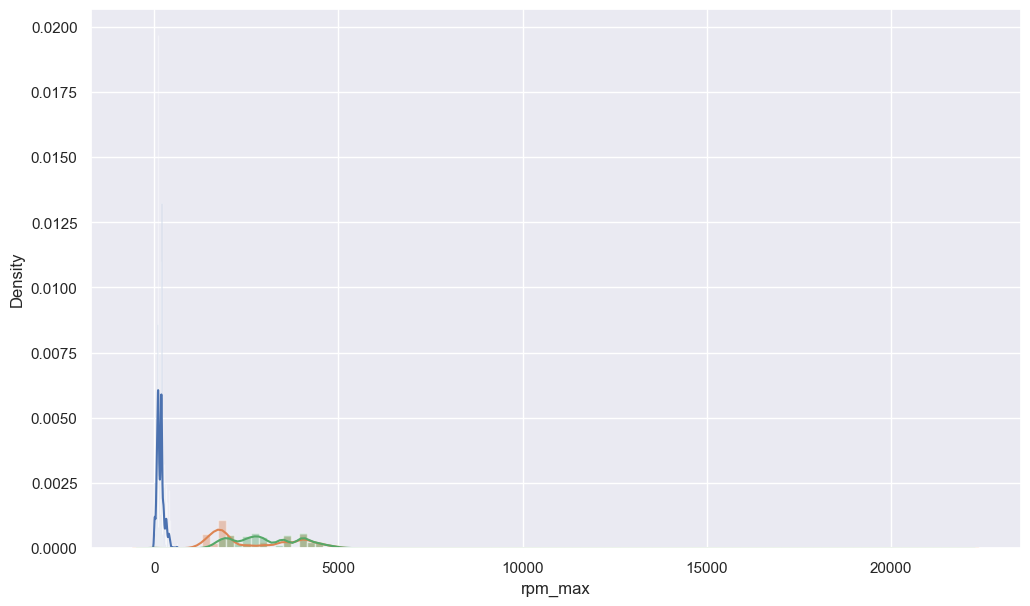

In [123]:
for col in ['torque_Nm', "rpm_min", "rpm_max"]:
    sns.set(rc = {"figure.figsize" : (12, 7)})
    sns.distplot(car_df[col], bins = 100)
    # plt.show()

In [119]:
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name,torque_Nm,rpm_min,rpm_max
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,190.00,2000,2000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,250.00,1500,2500
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,12.70,2700,2700
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,219.67,1750,2750
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,11.50,4500,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,Hyundai,i20 Magna,113.70,4000,4000
7902,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,Verna CRDi SX,24.00,1900,2750
7903,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire ZDi,190.00,2000,2000
7904,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,Tata,Indigo CR4,140.00,1800,3000


In [92]:
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,Hyundai,i20 Magna
7902,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,Verna CRDi SX
7903,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire ZDi
7904,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,Tata,Indigo CR4


In [127]:
car_df["age"] = 2025 - car_df["year"] 

In [128]:
df = car_df.copy()
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name,torque_Nm,rpm_min,rpm_max,age
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,190.00,2000,2000,11
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,250.00,1500,2500,11
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,12.70,2700,2700,19
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,219.67,1750,2750,15
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,11.50,4500,4500,18


In [130]:
df.drop(columns=["year", "torque"], inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,car_name,torque_Nm,rpm_min,rpm_max,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift Dzire VDI,190.00,2000,2000,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,250.00,1500,2500,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City 2017-2020 EXi,12.70,2700,2700,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20 Sportz Diesel,219.67,1750,2750,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift VXI BSIII,11.50,4500,4500,18


<Axes: >

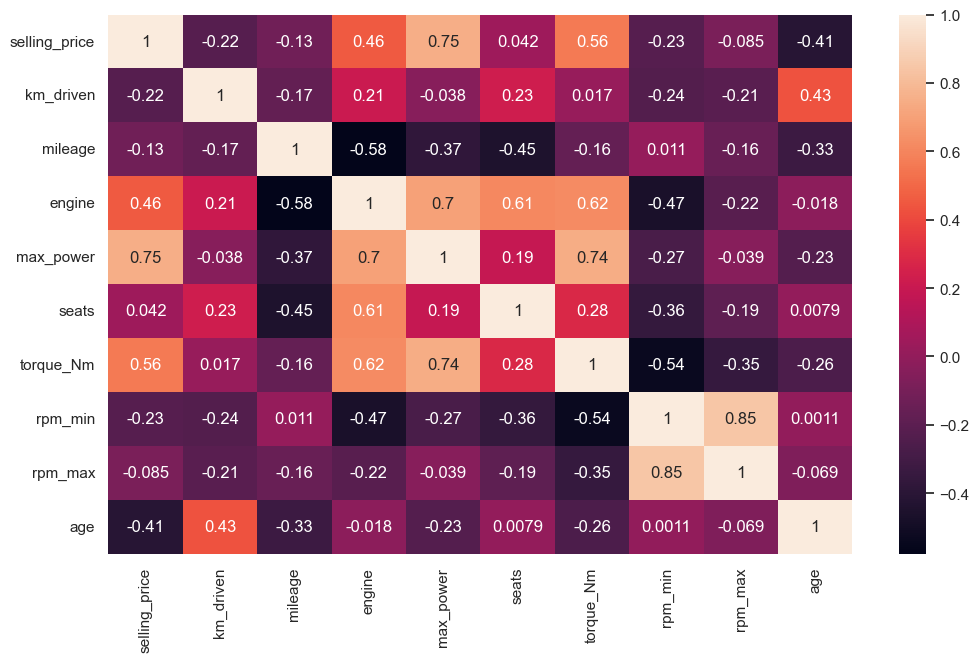

In [141]:
columns_col = []
for col in df.columns:
    if type(df[col][0]) != type(" "):
        columns_col.append(col)

sns.heatmap(df[columns_col].corr(), annot=True)

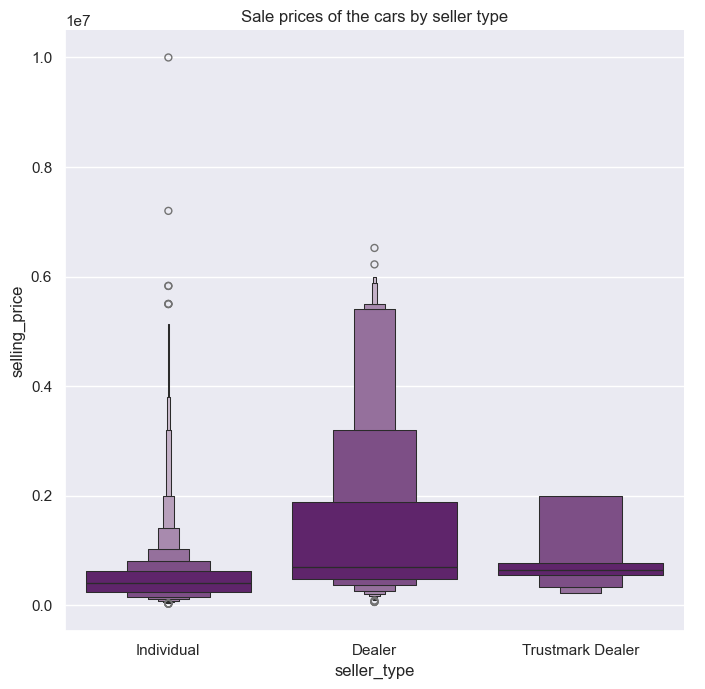

In [145]:
sns.catplot(x = "seller_type",
            y = "selling_price",
            kind = "boxen",
            height = 7,
            aspect = 1,
            color = "#671A76",
            data = df).set(title = "Sale prices of the cars by seller type")

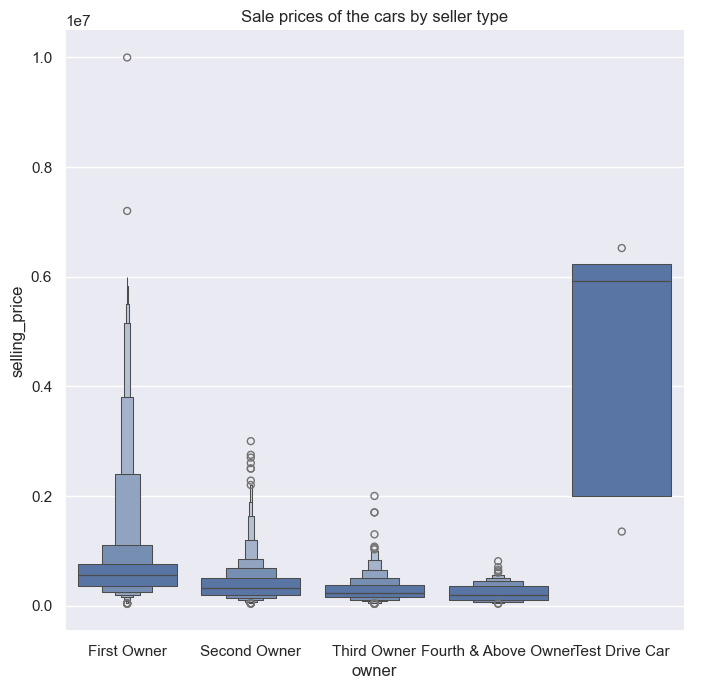

In [146]:
sns.catplot(x = "owner",
            y = "selling_price",
            kind = "boxen",
            height = 7,
            aspect = 1,
            data = df).set(title = "Sale prices of the cars by seller type")

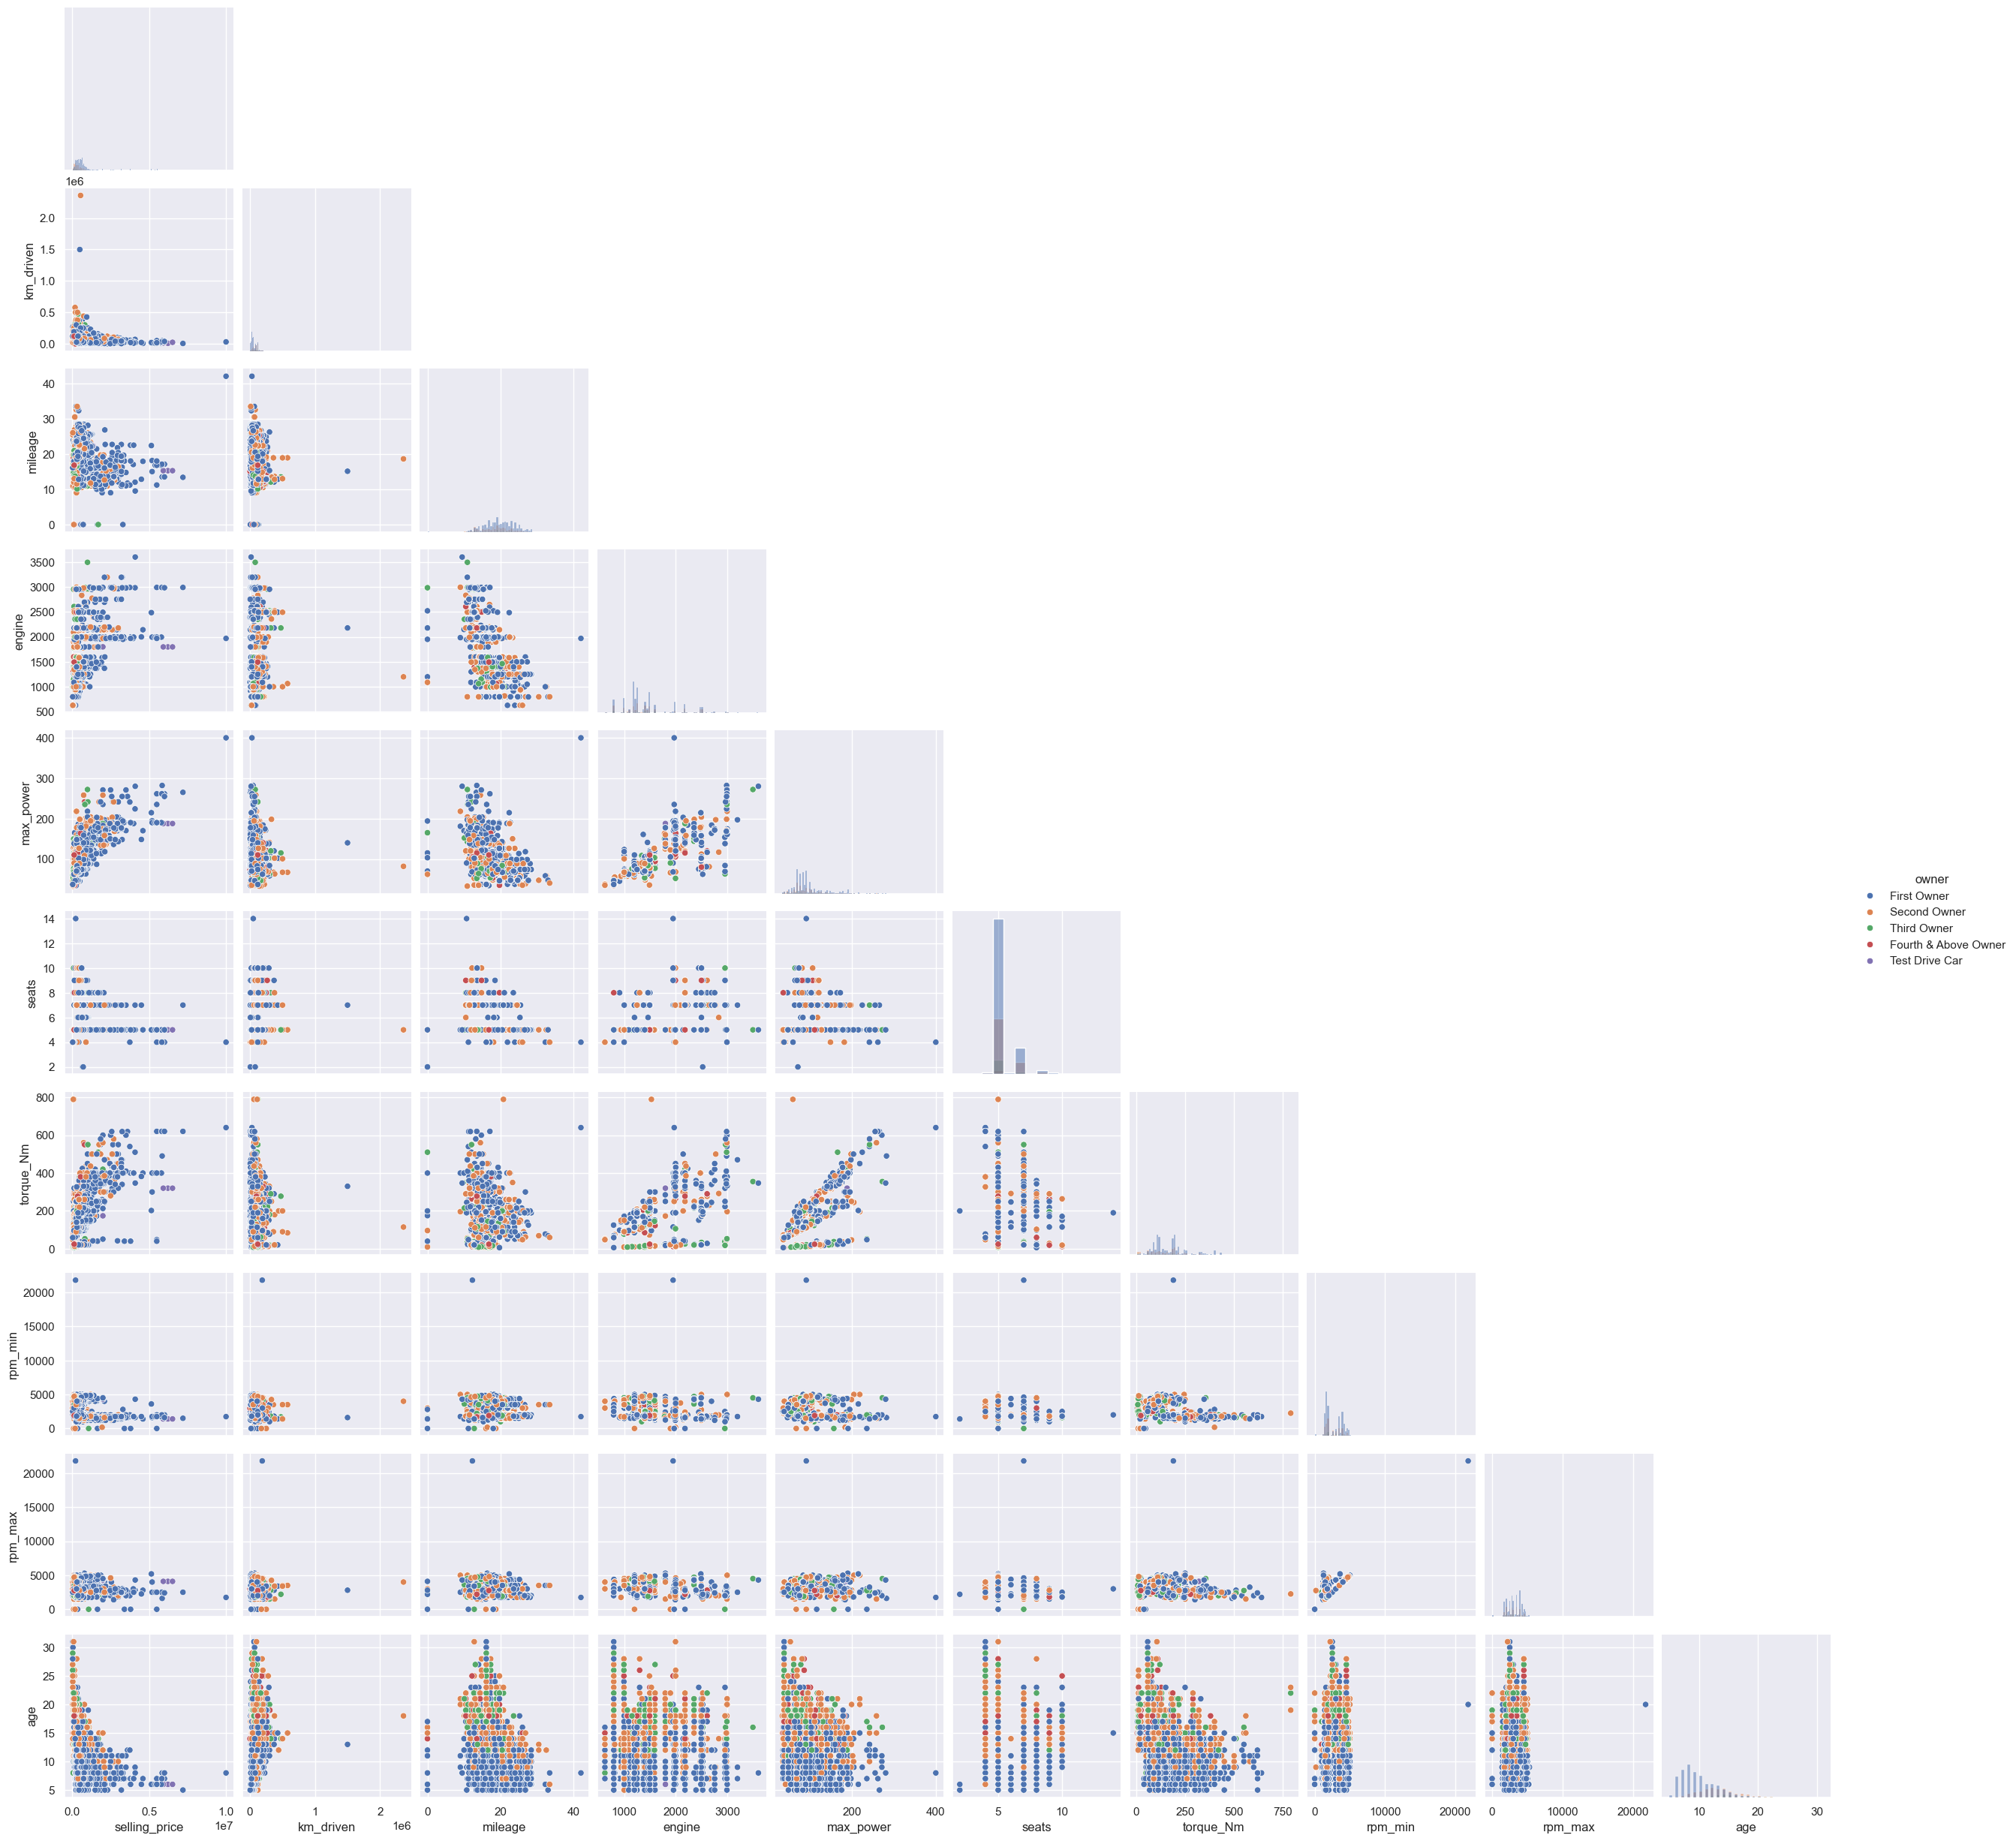

In [147]:
sns.pairplot(df, hue = "owner", diag_kind = "hist", corner = True)

In [148]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,car_name,torque_Nm,rpm_min,rpm_max,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift Dzire VDI,190.00,2000,2000,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,250.00,1500,2500,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City 2017-2020 EXi,12.70,2700,2700,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20 Sportz Diesel,219.67,1750,2750,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift VXI BSIII,11.50,4500,4500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai,i20 Magna,113.70,4000,4000,12
7902,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai,Verna CRDi SX,24.00,1900,2750,18
7903,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti,Swift Dzire ZDi,190.00,2000,2000,16
7904,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0,Tata,Indigo CR4,140.00,1800,3000,12


In [154]:
le = LabelEncoder()

df["car_name"] = le.fit_transform(df["car_name"])


X = df.drop("selling_price", axis=1)
y = df["selling_price"]

(X.shape, y.shape)

((7906, 15), (7906,))

In [168]:
X = pd.get_dummies(X,dtype=int,drop_first=True)


In [184]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold



In [193]:
columns_to_standardize = [
    "selling_price", "km_driven", "mileage", "engine", "max_power", 
    "seats", "torque_Nm", "rpm_min", "rpm_max", "age"
]

scaler = StandardScaler()


df_std = df.copy()
df_std[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


df_std["car_name"] = le.fit_transform(df_std["car_name"])


X = df_std.drop("selling_price", axis=1)
y = df_std["selling_price"]

X = pd.get_dummies(X,dtype=int,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X.shape, y.shape)


((7906, 50), (7906,))

In [190]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso":Lasso(),
    "LassoCV": LassoCV(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV()
}

In [194]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2') 
    print(f"{name} Cross-Validation R2 Score: {np.mean(scores):.4f}")


LinearRegression Cross-Validation R2 Score: 0.8385
Ridge Cross-Validation R2 Score: 0.8377
RidgeCV Cross-Validation R2 Score: 0.8372
Lasso Cross-Validation R2 Score: 0.0015
LassoCV Cross-Validation R2 Score: 0.6464
ElasticNet Cross-Validation R2 Score: 0.2153
ElasticNetCV Cross-Validation R2 Score: 0.6430


In [195]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    results.append({
        "Model": name,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
print(results_df)


              Model  Mean Absolute Error  Mean Squared Error  R2 Score
0  LinearRegression             0.195660            0.124835  0.881171
1             Ridge             0.198231            0.123479  0.882461
2           RidgeCV             0.195996            0.124577  0.881416
3             Lasso             0.538407            1.047373  0.003016
4           LassoCV             0.318974            0.356718  0.660444
5        ElasticNet             0.463123            0.829626  0.210287
6      ElasticNetCV             0.313579            0.363804  0.653698
